# r book

In [26]:
library(lubridate)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(linelist)

In [27]:
df <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [28]:
nrow(df)

[1] 700

In [29]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"July 14, 2022","July 14, 2022",Run,452,3.75571,2157,9.56352,1.0014,6.27384,59.9161,148,5684,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6712022614


In [30]:
# df <- separate(data = df, col = Date.Submitted, into = c("left", "middle", "right"), sep = " ")

In [34]:
write.csv(df, "user94403143_workout_history_clean.csv")

In [35]:
summary(df)

 Date.Submitted     Workout.Date       Activity.Type     
 Length:700         Length:700         Length:700        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                                                         
 Calories.Burned..kCal. Distance..mi.    Workout.Time..seconds.
 Min.   :   0.0         Min.   : 0.000   Min.   :    0         
 1st Qu.: 228.0         1st Qu.: 1.997   1st Qu.: 1451         
 Median : 403.0         Median : 3.100   Median : 1800         
 Mean   : 398.5         Mean   : 3.081   Mean   : 2403         
 3rd Qu.: 452.0         3rd Qu.: 3.513   3rd Qu.: 2330         
 Max.   :2473.0         Max.   :13.482   Max.   :80568         
                                                               
 Avg.Pace..min.mi. Max.P

In [36]:
df <- data.frame(df)

In [37]:
nrow(df)

[1] 700

In [38]:
df['duration'] <- df['Workout.Time..seconds.'] / 60

In [39]:
#determine your working library
getwd()

[1] "c:/Users/coleb/OneDrive/Coraline/MapMyRunProjects"

In [40]:
#download your file
#download.file("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", "user94403143_workout_history.csv")

In [41]:
#run_data <- read.csv("user94403143_workout_history.csv", header=TRUE)
run_data <- data.frame(df)

In [42]:
# df %>% mutate(Workout.date = Workout.Date %>% as.Date("%B %d, %Y"), left = month(Workout.Date, abbr = FALSE, label = TRUE))

In [43]:
# #convert the datetime variables using the following logic:
# #%B is a complete month name (November), %e is a day of the month (3) preceded by a space and followed by a comma and a space, and %Y is a four-digit year (2020).
# df$Workout.Date <- as.Date(df$Workout.Date, format = "%B %e, %Y")
# df$Date.Submitted <- as.Date(df$Date.Submitted, format = "%B %e, %Y")

In [44]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Workout.Date=mdy(Workout.Date))

In [45]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,duration
,<chr>,<date>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"July 14, 2022",2022-07-14,Run,452,3.75571,2157,9.56352,1.0014,6.27384,59.9161,148,5684,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6712022614,35.95


In [46]:
names(run_data)[names(run_data) == "Workout.Date"] <- "Date"
names(run_data)[names(run_data) == "Date.Submitted"] <- "Date.Sub"
names(run_data)[names(run_data) == "Workout.Time..seconds."] <- "Duration"
names(run_data)[names(run_data) == "Distance..mi."] <- "Distance"
names(run_data)[names(run_data) == "minutes"] <- "minutes"
names(run_data)[names(run_data) == "Activity.Type"] <- "Activity"
names(run_data)[names(run_data) == "Avg.Pace..min.mi."] <- "Avg.Pace"
names(run_data)[names(run_data) == "Max.Pace..min.mi."] <- "Max.Pace"
names(run_data)[names(run_data) == "Avg.Speed..mi.h."] <- "Avg.Spd"
names(run_data)[names(run_data) == "Avg.Heart.Rate"] <- "Avg.HR"
names(run_data)[names(run_data) == "Max.Speed..mi.h."] <- "Max.Spd"
names(run_data)[names(run_data) == "Calories.Burned..kCal."] <- "Cal.Burned"
head(run_data, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,Notes,Source,Link,duration
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,"July 14, 2022","July 14, 2022",Run,452,3.75571,2157,9.56352,1.00140,6.27384,59.9161,148,5684,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6712022614,35.95000
2,"July 13, 2022","July 13, 2022",Run,398,3.10820,1912,10.25040,1.09491,5.85340,54.7991,150,4991,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6710482102,31.86667


In [47]:
df <- within(run_data, rm('Link', 'Notes', 'Source'))
#df$minutes <- round(df$minutes, digits = 2)

In [48]:
#df$minutes <- as.numeric(as.character(df$minutes))
df <- df %>% mutate_if(is.numeric, round, digits = 2)

In [49]:
library(dplyr); df %>% mutate_if(is.numeric, round, digits=2)

Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"July 14, 2022","July 14, 2022",Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95
"July 13, 2022","July 13, 2022",Run,398,3.11,1912,10.25,1.09,5.85,54.80,150,4991,31.87
"July 12, 2022","July 12, 2022",Run,421,3.11,1968,10.55,1.07,5.69,56.08,155,5134,32.80
"July 12, 2022","July 11, 2022",Run,197,2.00,1409,11.74,1.91,5.11,31.34,145,3302,23.48
"July 10, 2022","July 10, 2022",Run,429,3.10,2301,12.37,0.99,4.85,60.41,149,5125,38.35
"July 9, 2022","July 9, 2022",Run,430,3.10,2005,10.77,1.17,5.57,51.45,157,5261,33.42
"July 8, 2022","July 8, 2022",Run,454,3.11,1988,10.65,3.88,5.63,15.47,165,5202,33.13
"June 24, 2022","June 24, 2022",Run,400,3.10,1554,8.35,0.00,7.18,0.00,NA,4192,25.90
"June 23, 2022","June 23, 2022",Run,410,3.10,1748,9.40,0.00,6.38,0.00,NA,4656,29.13


In [50]:
df <- df %>% drop_na(Date)
# df <- df %>% drop_na(Date.Sub)

In [51]:
nrow(df)

[1] 700

In [52]:
summary(df)

   Date.Sub             Date             Activity           Cal.Burned    
 Length:700         Length:700         Length:700         Min.   :   0.0  
 Class :character   Class :character   Class :character   1st Qu.: 228.0  
 Mode  :character   Mode  :character   Mode  :character   Median : 403.0  
                                                          Mean   : 398.5  
                                                          3rd Qu.: 452.0  
                                                          Max.   :2473.0  
                                                                          
    Distance         Duration        Avg.Pace          Max.Pace      
 Min.   : 0.000   Min.   :    0   Min.   :  0.000   Min.   :  0.000  
 1st Qu.: 1.998   1st Qu.: 1451   1st Qu.:  9.057   1st Qu.:  0.000  
 Median : 3.100   Median : 1800   Median :  9.730   Median :  0.870  
 Mean   : 3.081   Mean   : 2403   Mean   : 13.018   Mean   :  2.089  
 3rd Qu.: 3.513   3rd Qu.: 2330   3rd Qu.: 11.095 

In [53]:
library(data.table)
#setDT(df)[value==0, value := NA,]
#df[, value := replace(value, is.na(value), mean(value, na.rm = TRUE)) , by = .(year, age)]


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




In [54]:
HRmedian <- median(df$Avg.HR)
Stepsmedian <- median(df$Steps)

In [55]:
library(lubridate)
library(tidyverse)

df <- df %>% mutate(Date=mdy(Date))

In [56]:
# df[is.na(df)] = 0

In [57]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95
2,"July 13, 2022",2022-07-13,Run,398,3.11,1912,10.25,1.09,5.85,54.80,150,4991,31.87
3,"July 12, 2022",2022-07-12,Run,421,3.11,1968,10.55,1.07,5.69,56.08,155,5134,32.80
4,"July 12, 2022",2022-07-11,Run,197,2.00,1409,11.74,1.91,5.11,31.34,145,3302,23.48


In [58]:
df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == 0, HRmedian, Avg.HR))
# #df <- df %>% dplyr::mutate(Avg.HR = ifelse(Avg.HR == NA, HRmean, Avg.HR))
df <- df %>% dplyr::mutate(Steps = ifelse(Steps == 0, Stepsmedian, Steps))
# #df <- df %>% dplyr::mutate(Steps = ifelse(Steps == NA, Stepsmean, Steps))

In [59]:
df[is.na(df)] = 0

In [60]:
# df[df == 0] = NA

In [61]:
df$Avg.HR[is.na(df$Avg.HR)] <- median(df$Avg.HR, na.rm = TRUE)
df$Steps[is.na(df$Steps)] <- median(df$Steps, na.rm = TRUE)
df$Max.Pace[is.na(df$Max.Pace)] <- median(df$Max.Pace, na.rm = TRUE)
df$Avg.Pace[is.na(df$Avg.Pace)] <- median(df$Avg.Pace, na.rm = TRUE)
df$Max.Spd[is.na(df$Max.Spd)] <- median(df$Max.Spd, na.rm = TRUE)
df$Avg.Spd[is.na(df$Avg.Spd)] <- median(df$Avg.Spd, na.rm = TRUE)
df$Cal.Burned[is.na(df$Cal.Burned)] <- median(df$Cal.Burned, na.rm = TRUE)

In [62]:
df$day <- weekdays(as.Date(df$Date))
df$month <- months(as.Date(df$Date))
#df$year <- years(as.Date(df$Date))

In [63]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95,Thursday,July
2,"July 13, 2022",2022-07-13,Run,398,3.11,1912,10.25,1.09,5.85,54.80,150,4991,31.87,Wednesday,July
3,"July 12, 2022",2022-07-12,Run,421,3.11,1968,10.55,1.07,5.69,56.08,155,5134,32.80,Tuesday,July
4,"July 12, 2022",2022-07-11,Run,197,2.00,1409,11.74,1.91,5.11,31.34,145,3302,23.48,Monday,July


In [64]:
library(ggplot2)

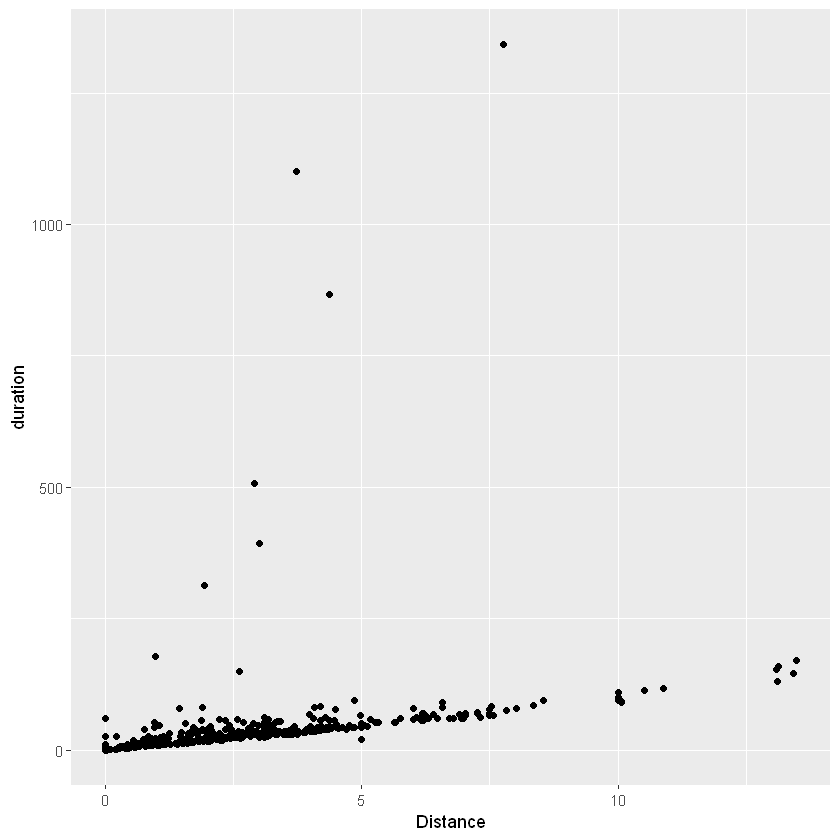

In [65]:
ggplot(data = df, mapping = aes(x = Distance, y = duration)) + 
    geom_point()

In [72]:
#Remove erroneous data (I know I have not run anything over 170 minutes)
df <- df[df$duration < 170,]
df <- df[df$Avg.Spd < 10,]
df <- df[df$Cal.Burned < 2000,]
df <- df[df$Date > '2019-01-01',]

In [73]:
#Create subsets for years 2021 and 2022
df2022 <- df[df$Date.Sub >= "2022-01-01",]
df2021 <- subset(df, Date.Sub < "2022-01-01" & Date.Sub >= "2021-01-01")

In [74]:
df$year <- format(df$Date.Sub, format = "%Y")
df$year <- as.integer(df$year)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [75]:
tail(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
693,"May 19, 2019",2019-05-19,Run,419,3.11,2197,11.69,2.06,5.13,29.17,139,5295,36.62,Sunday,May,NA
694,"May 15, 2019",2019-05-15,Indoor Run / Jog,403,3.13,2344,12.48,0.00,4.81,0.00,0,6926,39.07,Wednesday,May,NA
695,"May 13, 2019",2019-05-13,Run,258,1.96,1214,10.32,2.67,5.82,22.45,0,3209,20.23,Monday,May,NA
696,"May 13, 2019",2019-05-13,Indoor Run / Jog,191,1.42,927,10.88,17.09,5.51,3.51,158,67,15.45,Monday,May,NA


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Computation failed in `stat_smooth()`:
there is no package called 'mgcv'"


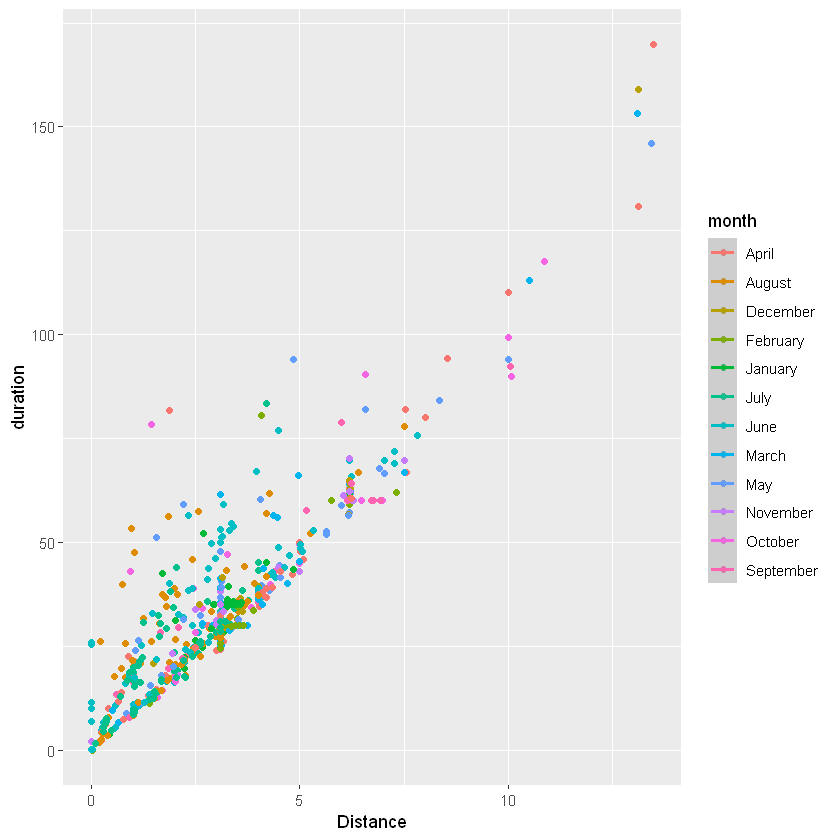

In [76]:
ggplot(data = df, mapping = aes(x = Distance, y = duration, color = month)) + 
    geom_point() + geom_smooth(aes(color = year))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



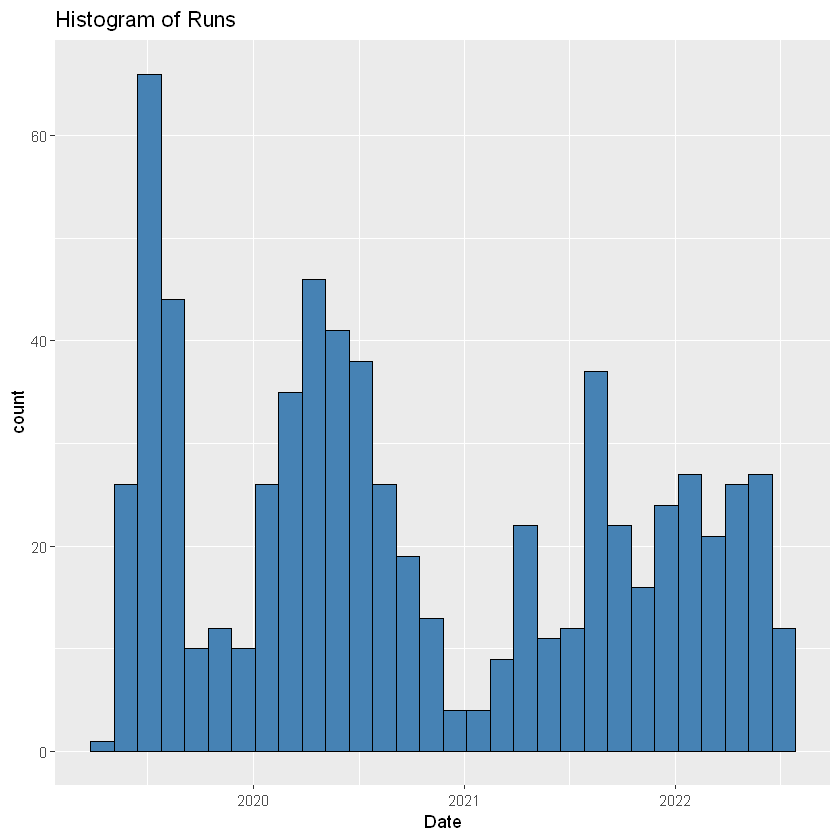

In [77]:
library(ggplot2)
ggplot(data=df, aes(x=Date)) +
  geom_histogram(fill="steelblue", color="black") +
  ggtitle("Histogram of Runs")

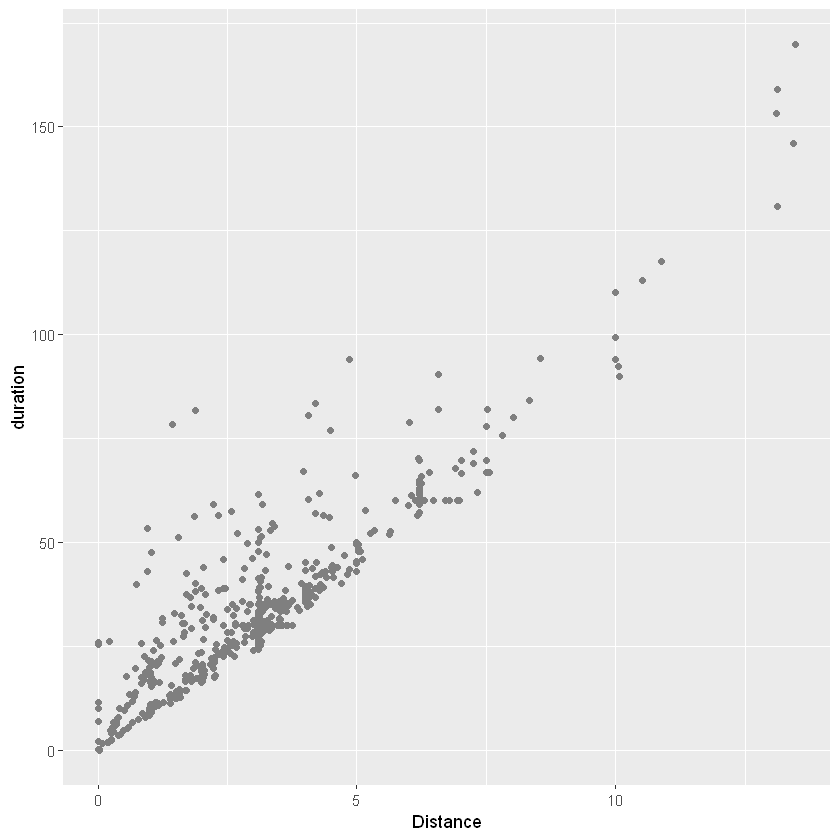

In [78]:
ggplot(data=df, aes(x=Distance, y=duration, color=year)) + 
  geom_point()

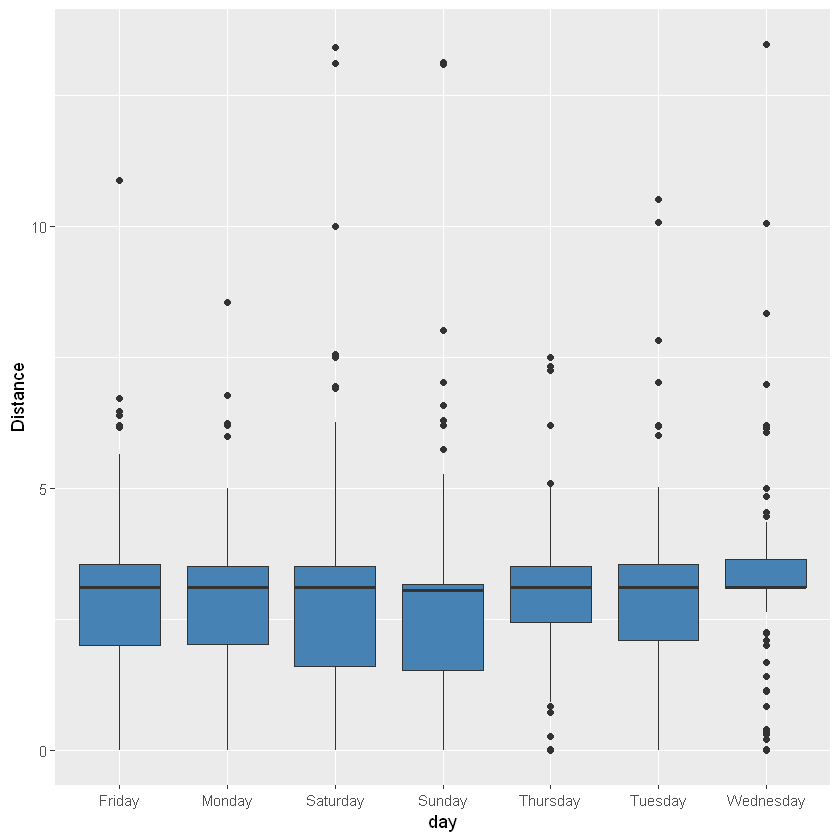

In [79]:
ggplot(data=df, aes(x=day, y=Distance)) + 
  geom_boxplot(fill="steelblue")

In [80]:
df <- df %>% mutate(new_bin = cut(Distance, breaks=c(0, 3.09, 6.21, 13.09, 15)))


In [81]:
names(df)[names(df) == "new_bin"] <- "Miles"

In [82]:
head(df, 1)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1,6.27,59.92,148,5684,35.95,Thursday,July,NA,"(3.09,6.21]"


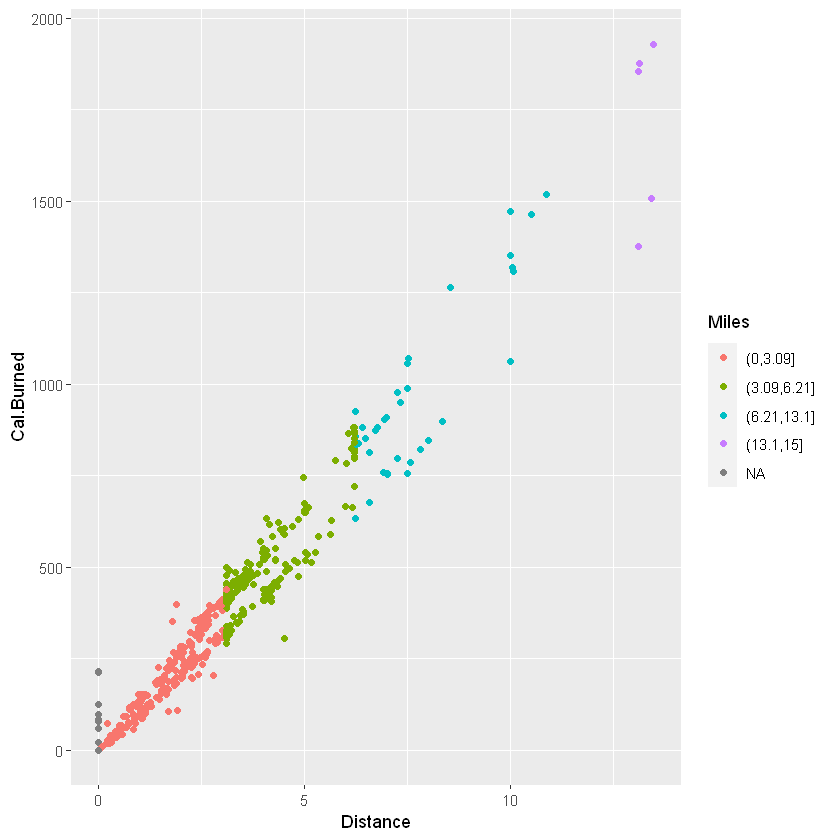

In [83]:
ggplot(data=df, aes(x=Distance, y=Cal.Burned, color=Miles)) + 
  geom_point()

In [84]:
sapply(df, function(x) sum(is.na(x)))
sapply(df, function(x) sum(duplicated(x)))


Date.Sub       Date   Activity Cal.Burned   Distance   Duration   Avg.Pace 
         0          0          0          0          0          0          0 
  Max.Pace    Avg.Spd    Max.Spd     Avg.HR      Steps   duration        day 
         0          0          0          0          0          0          0 
     month       year      Miles 
         0        687         19

Date.Sub       Date   Activity Cal.Burned   Distance   Duration   Avg.Pace 
       186        167        681        308        395        123        298 
  Max.Pace    Avg.Spd    Max.Spd     Avg.HR      Steps   duration        day 
       436        378        251        613         67        123        680 
     month       year      Miles 
       675        686        682

In [85]:
head(df, 4)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95,Thursday,July,NA,"(3.09,6.21]"
2,"July 13, 2022",2022-07-13,Run,398,3.11,1912,10.25,1.09,5.85,54.80,150,4991,31.87,Wednesday,July,NA,"(3.09,6.21]"
3,"July 12, 2022",2022-07-12,Run,421,3.11,1968,10.55,1.07,5.69,56.08,155,5134,32.80,Tuesday,July,NA,"(3.09,6.21]"
4,"July 12, 2022",2022-07-11,Run,197,2.00,1409,11.74,1.91,5.11,31.34,145,3302,23.48,Monday,July,NA,"(0,3.09]"


In [86]:
nrow(df)

[1] 687

# Amazon Halo Data

In [87]:
hdf <- read.csv("C:\\Users\\coleb\\OneDrive\\Cosmo\\Datasets\\Amazon Health Data\\Activity\\Activity_Workouts_1970-01-01--2022-07-15_637a6b45-761f-4361-b9e9-13651fb7ee20.csv")

In [88]:
head(hdf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Software.OS,Software.OS.Version,Active.Time..ms.,Total.Duration..ms.,Activity.Pause,Session.Source
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,ios,15.6,1800000,1800000,Not Applicable,User Logged
2,2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,ios,15.6,2450749,2450749,Not Applicable,User Logged


In [89]:
cadf <- within(hdf, rm('Activity.Pause', 'Session.Source', 'Software.OS.Version', 'Software.OS'))

In [90]:
head(cadf, 2)

,Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000
2,2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749


### Test Split Date

In [91]:
dtparts <- t(as.data.frame(str_split(cadf$Start.Time, "T")))

In [92]:
row.names(dtparts) = NULL

In [93]:
install.packages("chron")
library(chron)

Installing package into 'C:/Users/coleb/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'chron' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'chron'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\coleb\OneDrive\Documents\R\win-library\4.1\00LOCK\chron\libs\x64\chron.dll to C:\Users\coleb\OneDrive\Documents\R\win-library\4.1\chron\libs\x64\chron.dll: Permission denied"
Warning message:
"restored 'chron'"



The downloaded binary packages are in
	C:\Users\coleb\AppData\Local\Temp\Rtmp4wFzbl\downloaded_packages



Attaching package: 'chron'


The following objects are masked from 'package:lubridate':

    days, hours, minutes, seconds, years




In [94]:
dates = dtparts[,1]
times = dtparts[,2]

In [95]:
dates <- as.Date(dates)
dates <- as.data.frame(dates)


In [96]:
names(dates)[names(dates) == "dates"] <- "Date"

In [97]:
cadf <- as.data.frame(cadf)

In [98]:
merge(cadf, dates)

Start.Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,Date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
2022-07-15T22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000,2022-07-15
2022-07-14T12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749,2022-07-15
2022-07-13T17:12:44.344Z,2022-07-13T17:34:00.000Z,WORKOUT,OTHER,Automatic,-6,8.910933333333334,No Data,495656.0,122,93,794,122,1.0.118889,1275656,1275656,2022-07-15
2022-07-13T16:30:21.362Z,2022-07-13T17:11:12.440Z,WORKOUT,RUNNING,Automatic,-6,73.20733333333334,1980000.0,432440.0,172,143,5199,593,1.0.118889,2451078,2451078,2022-07-15
2022-07-13T05:23:29.314Z,2022-07-13T05:37:25.906Z,WORKOUT,WALKING,Automatic,-6,0.5755716666666667,No Data,No Data,110,87,1125,89,1.0.118889,836592,836592,2022-07-15
2022-07-12T17:58:11.466Z,2022-07-12T18:09:08.976Z,WORKOUT,WALKING,Automatic,-6,1.4,No Data,60000.0,104,79,775,48,1.0.118889,657510,657510,2022-07-15
2022-07-12T16:00:00.000Z,2022-07-12T16:10:00.000Z,WORKOUT,OTHER,Automatic,-6,9.0,No Data,540000.0,125,115,674,97,1.0.118889,600000,600000,2022-07-15
2022-07-12T15:21:45.615Z,2022-07-12T15:59:37.701Z,WORKOUT,RUNNING,Automatic,-6,68.7403375,1980000.0,157701.0,172,149,5533,608,1.0.118889,2272086,2272086,2022-07-15
2022-07-11T21:12:24.182Z,2022-07-11T21:33:19.401Z,WORKOUT,WALKING,Automatic,-6,4.646015833333333,No Data,240000.0,114,99,1424,162,1.0.118889,1255219,1255219,2022-07-15


In [99]:
#cadf %>% separate(Start.Time, c(Date, Time), "T")

### Better date split option

In [100]:
library(dplyr)
library(tidyr)
cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [101]:
head(cadf, 2)

,Date,Time,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-15,22:04:00.000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000
2,2022-07-14,12:50:31.751Z,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,1.0.118889,2450749,2450749


In [102]:
cadf <- cadf %>% mutate(Date = as.Date(Date))

In [103]:
# mymerge <- merge(cadf, df, by = c("Date"))

In [104]:
library(stringr)
library(tidyr)
cadf <- separate(cadf, Time, c('Times', 'Ms'), "[.]")

In [105]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2022-07-15,22:04:00,000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000


In [106]:
cadf$DTS <- with(cadf, ymd(Date) + hms(Times))

In [107]:
library("lubridate")
hours <- -3600 * cadf$Local.Time.Zone.Offset
cadf$my_date_time1 <- cadf$DTS + (-3600 * cadf$Local.Time.Zone.Offset)

In [108]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,my_date_time1
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>
1,2022-07-15,22:04:00,000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1.0.118889,1800000,1800000,2022-07-15 22:04:00,2022-07-16 04:04:00


In [109]:
cadf <- separate(cadf, my_date_time1, c('Date 2', 'Time 2'), " ")

In [110]:
head(cadf, 1)

,Date,Times,Ms,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,⋯,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Software.Version,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2,Time 2
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
1,2022-07-15,22:04:00,000Z,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,⋯,115,92,600,168,1.0.118889,1800000,1800000,2022-07-15 22:04:00,2022-07-16,04:04:00


In [111]:
cadf <- within(cadf, rm('Date', 'Time 2', 'Software.Version', 'Ms'))

In [112]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date 2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,22:04:00,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1800000,1800000,2022-07-15 22:04:00,2022-07-16
2,12:50:31,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,2450749,2450749,2022-07-14 12:50:31,2022-07-14


In [113]:
names(cadf)[17] <- 'Date'

In [114]:
head(cadf, 2)

,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,Max.Heart.Rate..bpm.,Average.Heart.Rate..bpm.,Steps,Calories,Active.Time..ms.,Total.Duration..ms.,DTS,Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1,22:04:00,2022-07-15T22:34:00.000Z,WORKOUT,OTHER,Automatic,-6,10.55,No Data,600000.0,115,92,600,168,1800000,1800000,2022-07-15 22:04:00,2022-07-16
2,12:50:31,2022-07-14T13:31:22.500Z,WORKOUT,RUNNING,Automatic,-6,74.44854083333334,2100000.0,262500.0,166,143,6084,622,2450749,2450749,2022-07-14 12:50:31,2022-07-14


In [115]:
df$Date <- as.Date(df$Date)
cadf$Date <- as.Date(cadf$Date)

In [116]:
head(df, 2)

,Date.Sub,Date,Activity,Cal.Burned,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps,duration,day,month,year,Miles
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>
1,"July 14, 2022",2022-07-14,Run,452,3.76,2157,9.56,1.00,6.27,59.92,148,5684,35.95,Thursday,July,NA,"(3.09,6.21]"
2,"July 13, 2022",2022-07-13,Run,398,3.11,1912,10.25,1.09,5.85,54.80,150,4991,31.87,Wednesday,July,NA,"(3.09,6.21]"


In [117]:
cadf2 <- filter(cadf, Session.Subtype == 'RUNNING')

In [118]:
mymerge <-merge(x=cadf2,y=df,by='Date')

In [119]:
length(mymerge)
length(cadf2)
length(df)
nrow(mymerge)
nrow(cadf2)
nrow(df)

[1] 33

[1] 17

[1] 17

[1] 144

[1] 155

[1] 687

In [120]:
mymerge <- mymerge[order(mymerge$Date),]

In [121]:
mymerge$year <- format(mymerge$Date, format = "%Y")

In [122]:
head(mymerge, 2)

,Date,Times,End.Time,Session.Type,Session.Subtype,Creation.Method,Local.Time.Zone.Offset,Activity.Score,Intense.Duration..ms.,Moderate.Duration..ms.,⋯,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,day,month,year,Miles
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,2021-09-23,12:18:41,2021-09-23T12:59:29.798Z,WORKOUT,RUNNING,Automatic,-5,76.51169,2160000.0,269798.0,⋯,2.40,5.98,24.99,146,5720,35.72,Thursday,September,2021,"(3.09,6.21]"
2,2021-09-24,12:30:07,2021-09-24T13:13:14.739Z,WORKOUT,RUNNING,Automatic,-5,76.28969833333333,2040000.0,494739.0,⋯,4.25,6.36,14.13,161,5340,33.58,Friday,September,2021,"(3.09,6.21]"


## EDA with my merged data set

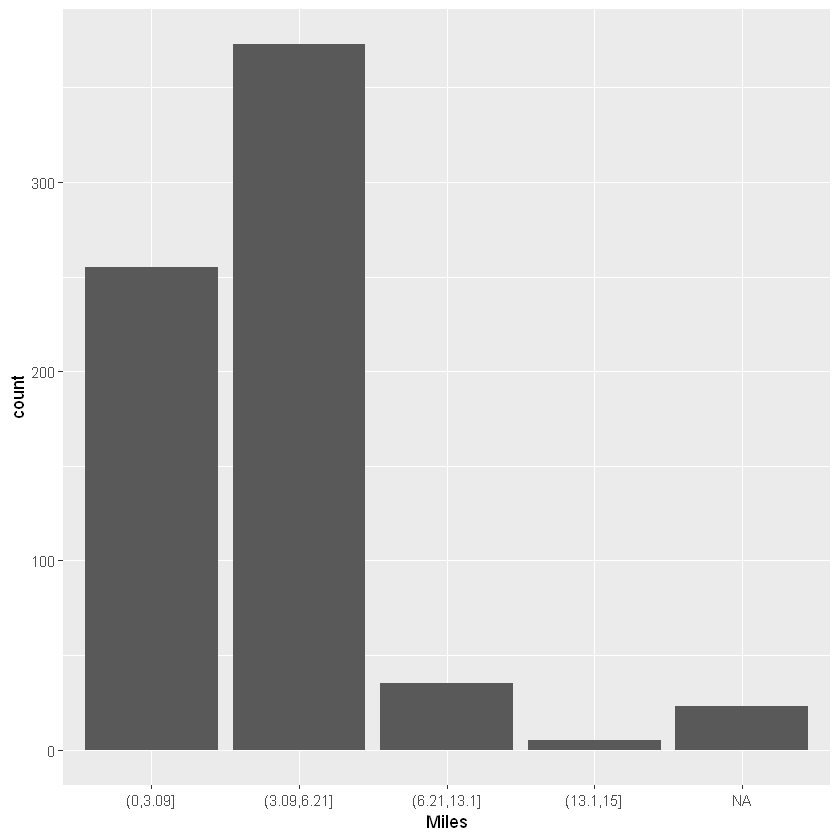

In [284]:
ggplot(data = df) +
  geom_bar(mapping = aes(x = Miles))

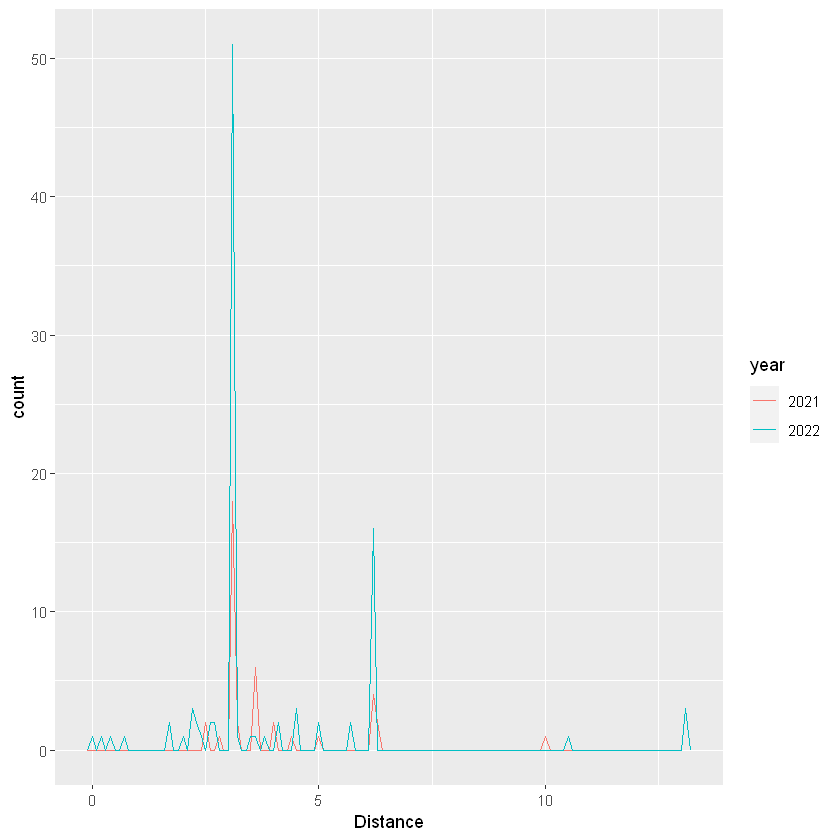

In [297]:
ggplot(data = mymerge, mapping = aes(x = Distance, colour = year)) +
  geom_freqpoly(binwidth = 0.1)

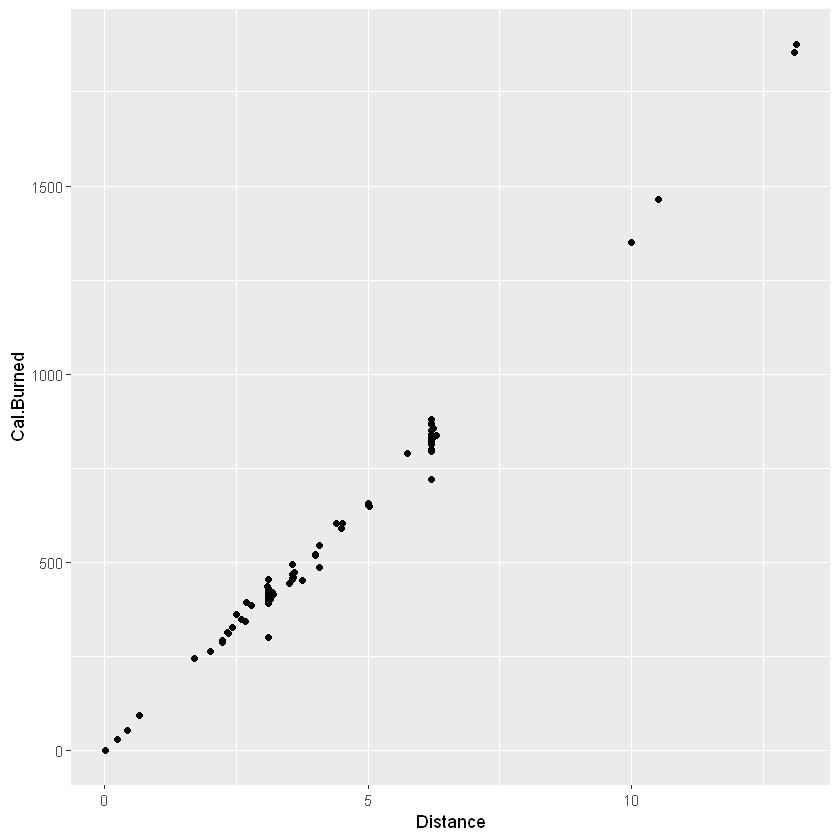

In [296]:
ggplot(data = mymerge, mapping = aes(x = Distance, y = Cal.Burned)) + 
  geom_point()

In [298]:
cormat <- round(cor(mymerge),2)
head(cormat)


ERROR: Error in cor(mymerge): 'x' must be numeric


#### Extra

In [766]:
# test <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [767]:
# library(dplyr)
# library(tidyr)
# cadf <- cadf %>% separate(Start.Time, c('Date', 'Time'), "T")

In [768]:
# cadf <- cadf %>% mutate(Date = as.Date(Date))

In [769]:
# names(test)[names(test) == "Workout.Date"] <- "Date"


In [770]:
# test$Workout.Date <- as.Date(test$Workout.Date, format = "%B %e, %Y")

In [771]:
# mmerge2 <- merge(test, df, by = "Date", all.x=TRUE)

In [772]:
head(mmerge2, 2)
mmerge2 <- as.data.frame(mmerge2)

ERROR: Error in head(mmerge2, 2): object 'mmerge2' not found


In [ ]:
mmerge2 <- mmerge2[order(mmerge2$Date, decreasing = TRUE),]

In [ ]:
mmerge2

,Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
,<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
676,2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
675,2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
674,2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
673,2022-06-24,"June 24, 2022",Run,400,3.10000,1554,8.35484,0.000000,7.18147,0.0000,⋯,3.10,1554,8.35,4.026,7.18,52.59158,140.5377,4192,25.90,2022
672,2022-06-23,"June 23, 2022",Run,410,3.10000,1748,9.39785,0.000000,6.38444,0.0000,⋯,3.10,1748,9.40,4.026,6.38,52.59158,140.5377,4656,29.13,2022
671,2022-06-22,"June 21, 2022",Run,403,3.10000,1665,8.95161,0.000000,6.70270,0.0000,⋯,3.10,1665,8.95,4.026,6.70,52.59158,140.5377,4458,27.75,2022
670,2022-06-19,"June 19, 2022",Run,378,2.66000,1800,11.27820,0.000000,5.32000,0.0000,⋯,2.66,1800,11.28,4.026,5.32,52.59158,140.5377,4713,30.00,2022
669,2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
668,2022-06-17,"June 16, 2022",Run,315,2.33000,1391,9.94993,0.000000,6.03019,0.0000,⋯,2.33,1391,9.95,4.026,6.03,52.59158,140.5377,3684,23.18,2022


In [ ]:
library(tidyr)
testdf2 <- mmerge2 %>% drop_na()

In [ ]:
testdf2

Date,Date.Submitted,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,⋯,Distance,Duration,Avg.Pace,Max.Pace,Avg.Spd,Max.Spd,Avg.HR,Steps.y,duration,year
<date>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2022-07-10,"July 10, 2022",Run,429,3.09815,2301,12.37320,0.993196,4.84920,60.4110,⋯,3.10,2301,12.37,0.990,4.85,60.41000,149.0000,5125,38.35,2022
2022-07-09,"July 9, 2022",Run,430,3.10009,2005,10.77380,1.166080,5.56904,51.4543,⋯,3.10,2005,10.77,1.170,5.57,51.45000,157.0000,5261,33.42,2022
2022-07-08,"July 8, 2022",Run,454,3.10995,1988,10.64940,3.878360,5.63410,15.4704,⋯,3.11,1988,10.65,3.880,5.63,15.47000,165.0000,5202,33.13,2022
2022-06-18,"June 18, 2022",Run,370,2.57857,1698,10.96610,1.112400,5.47140,53.9375,⋯,2.58,1698,10.97,1.110,5.47,53.94000,159.0000,4431,28.30,2022
2022-06-12,"June 12, 2022",Run,428,3.09762,1955,10.51630,3.008140,5.70545,19.9459,⋯,3.10,1955,10.52,3.010,5.71,19.95000,140.5377,5052,32.58,2022
2022-06-10,"June 10, 2022",Run,881,6.20257,4182,11.23370,0.599692,5.34108,100.0510,⋯,6.20,4182,11.23,0.600,5.34,100.05000,153.0000,10479,69.70,2022
2022-06-08,"June 9, 2022",Run,407,3.11000,1702,9.12111,0.000000,6.57814,0.0000,⋯,3.11,1702,9.12,4.026,6.58,52.59158,153.0000,4548,28.37,2022
2022-06-06,"June 6, 2022",Run,590,4.50165,2924,10.82230,1.146470,5.54409,52.3344,⋯,4.50,2924,10.82,1.150,5.54,52.33000,145.0000,7739,48.73,2022
2022-06-05,"June 5, 2022",Walk,253,1.88061,2402,21.27700,1.791470,2.81995,33.4920,⋯,1.88,2402,21.28,1.790,2.82,33.49000,109.0000,3994,40.03,2022


In [ ]:
library(tidyr)
test <- separate(test, Time, c('Times', 'Ms'), "[.]")

In [ ]:
library("lubridate")
hours <- -3600 * mymerge$Local.Time.Zone.Offset
mymerge$my_date_time1 <- mymerge$DTS + (-3600 * mymerge$Local.Time.Zone.Offset)